In [1]:
import pandas as pd #Library for operations related to dataframe
import numpy as np #
import matplotlib.pyplot as plt #Library for plotting functions
import seaborn as sns #Library for plotting functions
print("Success")

Success


In [159]:
df = pd.read_csv("/content/data.txt", delimiter="|") # Reading the data from pipe delimited text file
df.head() # Displaying the first five rows

,date,gdp,consumption,invest,government,dpi,cpi,m1,tbill,unemp,population,inflation,interest
0,1950 Q1,1610.5,1058.9,198.1,361.0,1186.1,70.6,110.20,1.12,6.4,149.461,NaN,NaN
1,1950 Q2,1658.8,1075.9,220.4,366.4,1178.1,71.4,111.75,1.17,5.6,150.260,4.5071,-3.3404
2,1950 Q3,1723.0,1131.0,239.7,359.6,1196.5,73.2,112.95,1.23,4.6,151.064,9.9590,-8.7290
3,1950 Q4,1753.9,1097.6,271.8,382.5,1210.0,74.9,113.93,1.35,4.2,151.871,9.1834,-7.8301
4,1951 Q1,1773.5,1122.8,242.9,421.9,1207.9,77.3,115.08,1.40,3.5,152.393,12.6160,-11.2160


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         204 non-null    int64  
 1   gdp          204 non-null    float64
 2   consumption  204 non-null    float64
 3   invest       204 non-null    float64
 4   government   204 non-null    float64
 5   dpi          204 non-null    float64
 6   cpi          204 non-null    float64
 7   m1           204 non-null    float64
 8   tbill        204 non-null    float64
 9   unemp        204 non-null    float64
 10  population   204 non-null    float64
 11  inflation    203 non-null    float64
 12  interest     203 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 20.8 KB


In [161]:
df.date = df.date.apply(lambda x: int(x[:4]))

In [6]:
df_sub = df[["date","consumption", "dpi", "unemp"]].copy()
df_sub

,date,consumption,dpi,unemp
0,1950,1058.9,1186.1,6.4
1,1950,1075.9,1178.1,5.6
2,1950,1131.0,1196.5,4.6
3,1950,1097.6,1210.0,4.2
4,1951,1122.8,1207.9,3.5
...,...,...,...,...
199,1999,6083.6,6379.2,4.1
200,2000,6171.7,6431.6,4.0
201,2000,6226.3,6523.7,4.0
202,2000,6292.1,6566.5,4.1


In [7]:
consum = df_sub.consumption.values.tolist()
dpi = df_sub.dpi.values.tolist()
unemp = df_sub.unemp.values.tolist()

prev_c = consum[0]
prev_d = dpi[0]
prev_u = unemp[0]

Dc = []
Dd = []
Du = []

for c,d,u in zip(consum[1:], dpi[1:], unemp[1:]):
  Dc.append(c-prev_c)
  Dd.append(d-prev_d)
  Du.append(u-prev_u)

  prev_c = c 
  prev_d = d
  prev_u = u
  #print(c, d, u)
df_new = pd.DataFrame(list(zip(Dc, Dd, Du)), columns = ['D_consum', 'D_dpi', 'D_unemp'])
df_new

,D_consum,D_dpi,D_unemp
0,17.0,-8.0,-0.8
1,55.1,18.4,-1.0
2,-33.4,13.5,-0.4
3,25.2,-2.1,-0.7
4,-31.4,17.9,-0.4
...,...,...,...
198,83.6,46.8,-0.1
199,88.1,52.4,-0.1
200,54.6,92.1,0.0
201,65.8,42.8,0.1


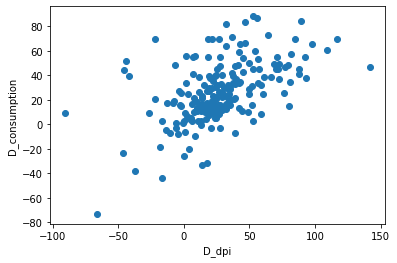

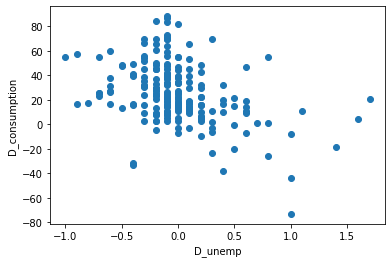

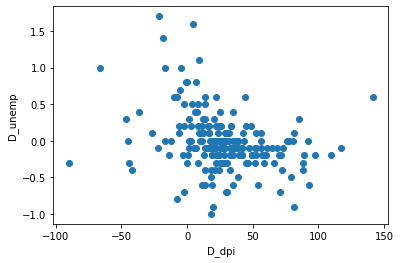

In [11]:
plt.scatter(df_new.D_dpi, df_new.D_consum)
plt.xlabel("D_dpi")
plt.ylabel("D_consumption")
plt.show()

plt.scatter(df_new.D_unemp, df_new.D_consum)
plt.xlabel("D_unemp")
plt.ylabel("D_consumption")
plt.show()

plt.scatter(df_new.D_dpi, df_new.D_unemp)
plt.xlabel("D_dpi")
plt.ylabel("D_unemp")
plt.show()

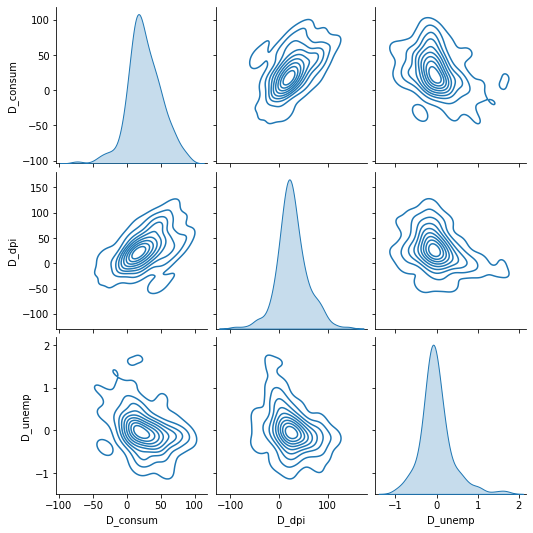

In [10]:
sns.pairplot(df_new, kind = 'kde')

In [12]:
x = np.array(df_new[['D_unemp', 'D_dpi']].copy().values.tolist()).reshape((-1, 2))
X = x.copy()
y = np.array(df_new.D_consum.values.tolist())
print(x[:10,:], y[:10])

[[-0.8 -8. ]
 [-1.  18.4]
 [-0.4 13.5]
 [-0.7 -2.1]
 [-0.4 17.9]
 [ 0.1 10. ]
 [ 0.2  2.7]
 [-0.3  0. ]
 [-0.1 13.5]
 [ 0.2 24.1]] [ 17.   55.1 -33.4  25.2 -31.4  12.5   6.6   3.1  21.5   5.3]


In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   D_consum  203 non-null    float64
 1   D_dpi     203 non-null    float64
 2   D_unemp   203 non-null    float64
dtypes: float64(3)
memory usage: 4.9 KB


In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#const = [i+1 for i in range(len(df_new))]
x = sm.add_constant(x)
#model = 
results = ols('D_consum ~ D_dpi + D_unemp', data = df_new).fit()
print(results.pvalues)
print(results.summary())

Intercept    3.785079e-15
D_dpi        2.844072e-12
D_unemp      3.656540e-05
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               D_consum   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     50.31
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           2.00e-18
Time:                        09:21:04   Log-Likelihood:                -898.12
No. Observations:                 203   AIC:                             1802.
Df Residuals:                     200   BIC:                             1812.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

The above stats show a R-squared value of 0.335 which indicates not that the fit is not so great. And the DW Statistic is within the normal range of 2.0 ± 0.5, hence we can conclude that the parameters do not have a significant postive or negative correlation.

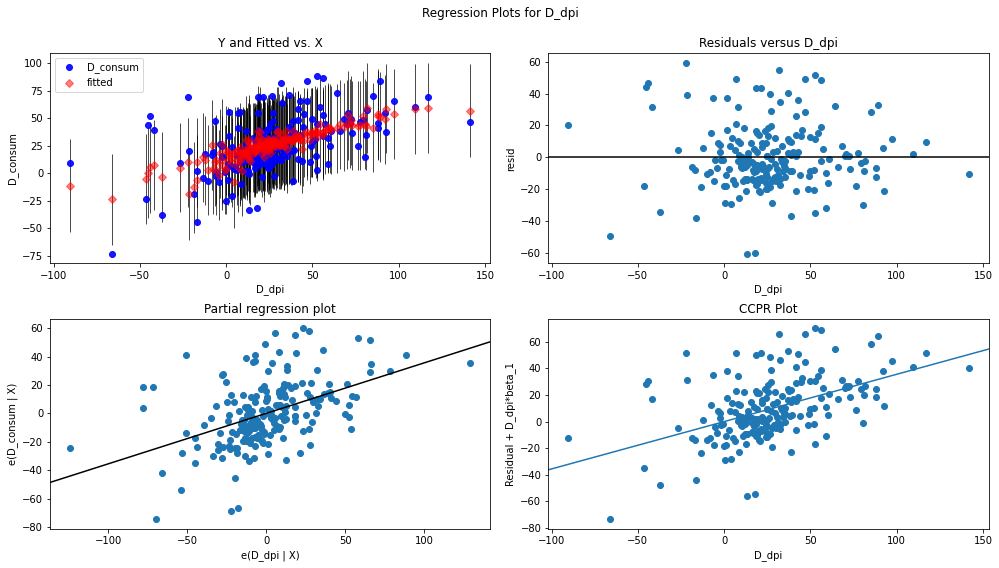

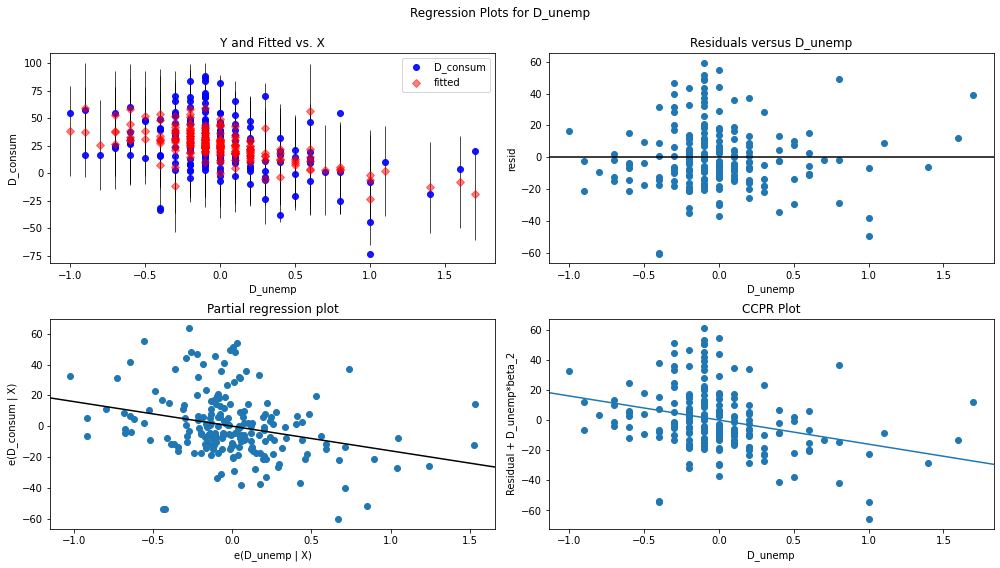

In [72]:
fig1 = plt.figure(figsize=(14, 8))
fig2 = plt.figure(figsize=(14, 8))
# creating regression plots
fig1 = sm.graphics.plot_regress_exog(results,'D_dpi', fig=fig1)
fig2 = sm.graphics.plot_regress_exog(results,'D_unemp', fig=fig2)

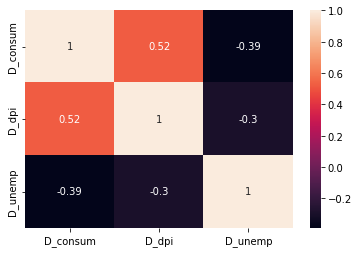

In [15]:
sns.heatmap(df_new.corr(), annot = True)

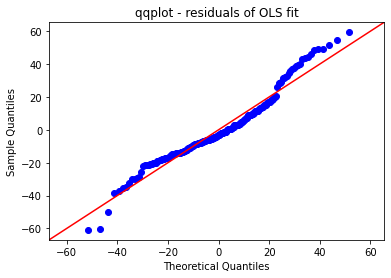

In [16]:
res = results.resid # residuals
pplot = sm.ProbPlot(res, loc = 0, scale = 20)
fig = pplot.qqplot(line = "45")
plt.title("qqplot - residuals of OLS fit")
plt.show()

In [17]:
np.mean(res), np.std(res)

(4.928296413547887e-14, 20.192070843504197)

The above tests conclude that the data input and assumptions are fine: 

1.   The residual is normally distributed, no pattern and structure
2.   The independent variables have a correlation of 0.52. Need to check auto-correlation.
3. No heteroskedacity.



In [20]:
df_new.describe()

,D_consum,D_dpi,D_unemp
count,203.000000,203.000000,203.000000
mean,26.020690,26.841379,-0.011823
std,24.816781,31.357875,0.395091
min,-73.200000,-90.300000,-1.000000
25%,11.500000,10.200000,-0.200000
50%,23.000000,24.100000,-0.100000
75%,41.200000,41.700000,0.100000
max,88.100000,141.600000,1.700000


In [29]:
def iqr_range(df_new, name_data):
  data = np.sort(np.array(df_new[str(name_data)])).reshape(-1,1)

  Q1 = np.percentile(data, 25, interpolation = 'midpoint') 
  Q2 = np.percentile(data, 50, interpolation = 'midpoint') 
  Q3 = np.percentile(data, 75, interpolation = 'midpoint') 
  
  print('Q1 - 25 percentile of the {} is {} '.format(name_data, round(Q1,6)))
  print('Q1 - 50 percentile of the {} is {} '.format(name_data, round(Q2,6)))
  print('Q1 - 75 percentile of the {} is {} '.format(name_data, round(Q3,6)))
  
  IQR = Q3 - Q1 
  print('Interquartile range for {} is {}'.format(name_data, round(IQR,6)))
  return (Q1, Q2, Q3, IQR)

In [66]:
Q1_dpi, Q2_dpi, Q3_dpi, IQR_dpi =iqr_range(df_new, 'D_dpi')
print("IQR Limits for D_dpi : [{} , {}]".format(round(Q1_dpi - 1.5*IQR_dpi,6), round(Q3_dpi + 1.5*IQR_dpi,6)))
print("\n")
Q1_unemp, Q2_unemp, Q3_unemp, IQR_unemp =iqr_range(df_new, 'D_unemp')
print("IQR Limits for D_unemp : [{} , {}]".format(round(Q1_unemp - 1.5*IQR_unemp, 6), round(Q3_unemp + 1.5*IQR_unemp,6)))

Q1 - 25 percentile of the D_dpi is 10.2 
Q1 - 50 percentile of the D_dpi is 24.1 
Q1 - 75 percentile of the D_dpi is 41.7 
Interquartile range for D_dpi is 31.5
IQR Limits for D_dpi : [-37.05 , 88.95]


Q1 - 25 percentile of the D_unemp is -0.2 
Q1 - 50 percentile of the D_unemp is -0.1 
Q1 - 75 percentile of the D_unemp is 0.1 
Interquartile range for D_unemp is 0.3
IQR Limits for D_unemp : [-0.65 , 0.55]


In [65]:
print("Number of Outlier in D_dpi : {}".format(
    ((df_new.D_dpi < Q1_dpi - 1.5*IQR_dpi) | (df_new.D_dpi > Q3_dpi + 1.5*IQR_dpi)).value_counts()[1]
    ))
print("Number of Outlier in D_unemp : {}".format(
    ((df_new.D_unemp < Q1_unemp - 1.5*IQR_unemp) | (df_new.D_unemp > Q3_unemp + 1.5*IQR_unemp)).value_counts()[1]
    ))

print("Number of Common index Outliers in D_dpi and D_unemp : {}".format(
    (((df_new.D_dpi < Q1_dpi - 1.5*IQR_dpi) | (df_new.D_dpi > Q3_dpi + 1.5*IQR_dpi)) &
((df_new.D_unemp < Q1_unemp - 1.5*IQR_unemp) | (df_new.D_unemp > Q3_unemp + 1.5*IQR_unemp))).value_counts()[1]
))

Number of Outlier in D_dpi : 13
Number of Outlier in D_unemp : 25
Number of Common index Outliers in D_dpi and D_unemp : 2


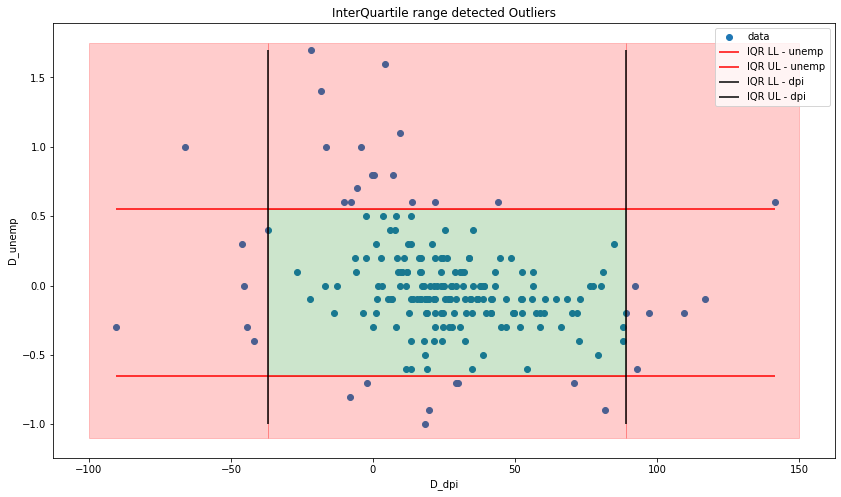

In [108]:
fig = plt.figure(figsize=(14, 8))
plt.scatter(df_new.D_dpi, df_new.D_unemp)
plt.hlines(-0.65, df_new.D_dpi.max(), df_new.D_dpi.min(), 'r')
plt.hlines(0.55, df_new.D_dpi.max(), df_new.D_dpi.min(), 'r')
plt.vlines(-37.05 ,df_new.D_unemp.max(), df_new.D_unemp.min())
plt.vlines(88.95 ,df_new.D_unemp.max(), df_new.D_unemp.min())
plt.xlabel("D_dpi")
plt.ylabel("D_unemp")
plt.legend(labels=['data', 'IQR LL - unemp', 'IQR UL - unemp', 'IQR LL - dpi', 'IQR UL - dpi']) 
plt.fill_between([-37.05, 88.95], -0.65, 0.55, color='green', alpha=0.2)
plt.fill_between([-37.05, 88.95], 0.55, 1.75, color='red', alpha=0.2)
plt.fill_between([-37.05, 88.95], -1.1, -0.65, color='red', alpha=0.2)
plt.fill_between([-100, -37.05], -1.1, 1.75, color='red', alpha=0.2)
plt.fill_between([88.95, 150], -1.1, 1.75, color='red', alpha=0.2)
plt.title("InterQuartile range detected Outliers")
plt.show()

In [112]:
df_n2 = df_new.copy()
df_n2 = df_n2.where((df_n2.D_dpi < Q1_dpi - 1.5*IQR_dpi) | (df_n2.D_dpi > Q3_dpi + 1.5*IQR_dpi) 
| (df_n2.D_unemp < Q1_unemp - 1.5*IQR_unemp) | (df_n2.D_unemp > Q3_unemp + 1.5*IQR_unemp)).dropna()
df_n2.head()

,D_consum,D_dpi,D_unemp
0,17.0,-8.0,-0.8
1,55.1,18.4,-1.0
3,25.2,-2.1,-0.7
14,-8.0,-4.3,1.0
15,4.4,4.4,1.6


In [111]:
results2 = ols('D_consum ~ D_dpi + D_unemp', data = df_n2).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:               D_consum   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     20.35
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           1.75e-06
Time:                        10:25:59   Log-Likelihood:                -163.09
No. Observations:                  36   AIC:                             332.2
Df Residuals:                      33   BIC:                             336.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.4354      4.366      4.451      0.0

#**Random Sampling - Bootstrap**

In [122]:
df_sam = df_new.sample(frac=1.0, replace=True).copy()
results_s = ols('D_consum ~ D_dpi + D_unemp', data = df_sam).fit()
results_s.scale**.5, results_s.bse, results_s.bse[0], results_s.bse[1], results_s.bse[2]

(18.459153476397532, Intercept    1.854705
 D_dpi        0.049635
 D_unemp      3.287516
 dtype: float64, 1.8547047161980768, 0.04963525756953411, 3.287516078487491)

In [128]:
reg = []
intcpt = []
dpi = []
unp = []

for i in range(0, 10000):
  df_sam = df_new.sample(frac=1.0, replace=True).copy()
  results_s = ols('D_consum ~ D_dpi + D_unemp', data = df_sam).fit()
  reg.append(results_s.scale**.5)
  intcpt.append(results_s.bse[0])
  dpi.append(results_s.bse[1])
  unp.append(results_s.bse[2])
df_se = pd.DataFrame(list(zip(reg, intcpt, dpi, unp)),columns = ["reg", "intercept", "D_dpi", "D_unemp"])

In [129]:
df_se

,reg,intercept,D_dpi,D_unemp
0,17.833686,1.863406,0.044555,3.913809
1,19.125297,1.827309,0.042474,3.348967
2,22.303168,2.160179,0.051426,3.966086
3,22.367814,2.180277,0.056342,4.242301
4,21.169146,1.996363,0.049674,4.062553
...,...,...,...,...
9995,17.238185,1.693288,0.040928,3.132912
9996,21.327739,2.088034,0.047694,4.233230
9997,22.227177,2.117759,0.053518,4.830113
9998,21.360016,2.088161,0.054773,3.864373


In [130]:
df_se.describe()

,reg,intercept,D_dpi,D_unemp
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,20.138493,1.908058,0.047889,3.819438
std,1.238176,0.133166,0.004597,0.373907
min,15.316333,1.382159,0.032195,2.625854
25%,19.309128,1.818381,0.044743,3.559021
50%,20.138564,1.904540,0.047671,3.799948
75%,20.978218,1.994404,0.050838,4.063040
max,24.920262,2.489620,0.067005,6.014500


In [131]:
results.bse

Intercept    1.910841
D_dpi        0.047779
D_unemp      3.792157
dtype: float64

In [132]:
df_se.to_csv('/content/df_se.csv', index = None)

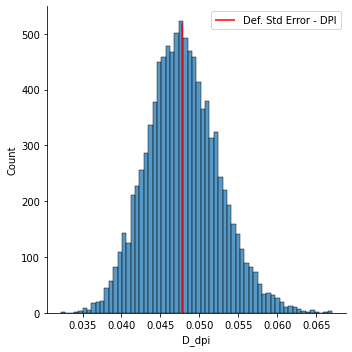

In [151]:
sns.displot(df_se.D_dpi)
plt.vlines(0.047779, 520, 0, 'r')
plt.legend(labels=['Def. Std Error - DPI'])

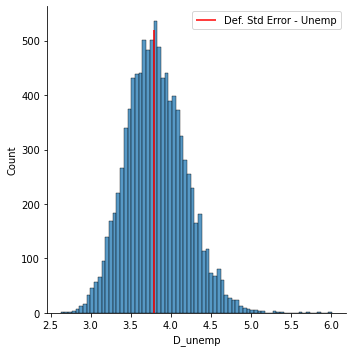

In [153]:
sns.displot(df_se.D_unemp)
plt.vlines(results.bse[2], 520, 0, 'r')
plt.legend(labels=['Def. Std Error - Unemp'])

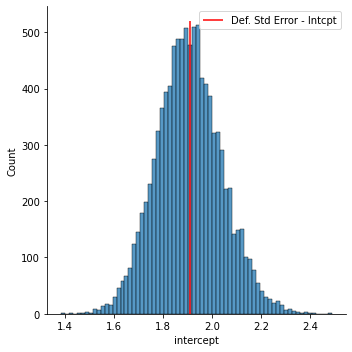

In [155]:
sns.displot(df_se.intercept)
plt.vlines(results.bse[0], 520, 0, 'r')
plt.legend(labels=['Def. Std Error - Intcpt'])

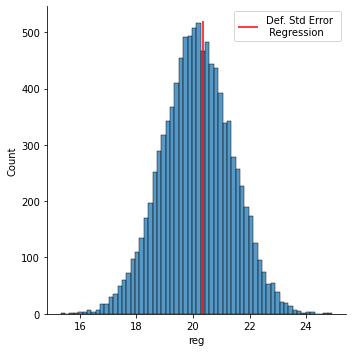

In [156]:
sns.displot(df_se.reg)
plt.vlines(results.scale**.5, 520, 0, 'r')
plt.legend(labels=['Def. Std Error \n Regression'])